# Getting started

Here we will show a very basic example: How to use GrandPy to perform kinetic modeling. For more notebooks explore the [notebook folder](../../tutorials/tutorials).

We will use data from [Finkel et al. (2021)](https://www.nature.com/articles/s41586-021-03610-3). These are SLAM-seq data from multiple time points (1h, 2h, 3h, 4h) after infecting Calu-3 cells with SARS-CoV-2 (or mock as control).

First, we load the GrandPy package and read the GRAND-SLAM that is part of the GrandPy package:

In [19]:
import warnings
import grandpy as gp

warnings.filterwarnings("ignore", category=UserWarning)

sars = gp.read_grand("../../grandpy/data/sars_R.tsv", design=("Condition", "dur.4sU", "Replicate"))
sars = sars.normalize()
print(sars)

Detected dense format -> using dense reader
GrandPy:
Read from sars_R
1045 genes, 12 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count', 'norm']
Available analyses: []
Available plots: {}
Default data slot: norm



The GRAND-SLAM output normally contains any gene with at least 1 read, i.e. > 30k genes. The data set that is part of GrandPy has been prefiltered and only consists of 1045 genes. For a complete workflow including filter, see the [kinetic modeling notebook](../notebook_02_kinetic_modeling.ipynb). Note that we also normalized the read counts (by using size factors), which added a *slot*.

We can start by creating a plot showing the kinetics for a gene:

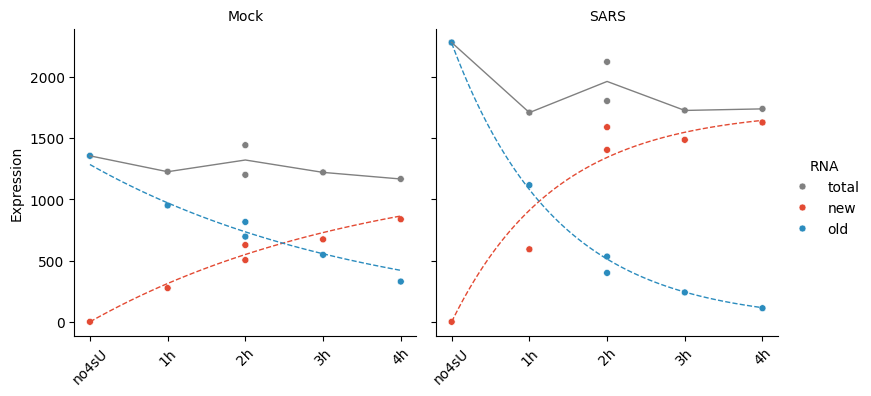

In [20]:
gp.plot_gene_progressive_timecourse(data=sars, gene="SRSF6", steady_state={"Mock": True, "SARS": False})

Note that this fitted the kinetic model, separately for the two conditions, for this gene. It used the `default_slot` (normalized counts). By using the `steady_state` parameter, we defined the mock infected control samples to be in steady state, whereas the virus infected samples should not be assumed to be in steady state.

We now fit the kinetic model for all genes:

In [21]:
sars = sars.fit_kinetics(steady_state={"Mock": True, "SARS": False}, max_processes=2)

Fitting SARS: 100%|██████████| 1045/1045 [00:05<00:00, 204.55it/s]


The modeling results are stored in two analysis tables:

In [22]:
sars.analyses

['kinetics_Mock', 'kinetics_SARS']

We can retrieve this table (for more information, see the [data handling notebook](../notebook_04_working_with_data_matrices_and_analysis_results.ipynb)):

In [23]:
sars.get_analysis_table().head()

,Symbol,Gene,Length,Type,Mock_Synthesis,Mock_Half-life,SARS_Synthesis,SARS_Half-life
Symbol,,,,,,,,
UHMK1,UHMK1,ENSG00000152332,8478,Cellular,175.303203,7.509571,310.337895,3.037640
ATF3,ATF3,ENSG00000162772,2103,Cellular,34.018585,0.943541,991.492945,0.274109
PABPC4,PABPC4,ENSG00000090621,3592,Cellular,213.387547,6.533790,515.859772,2.720617
ROR1,ROR1,ENSG00000185483,5832,Cellular,193.670366,3.556701,471.290988,1.290060
ZC3H11A,ZC3H11A,ENSG00000058673,11825,Cellular,251.705725,2.376121,782.878931,1.013014


We can also easily plot the RNA half-lives of mock infected cells against virus infected cells:

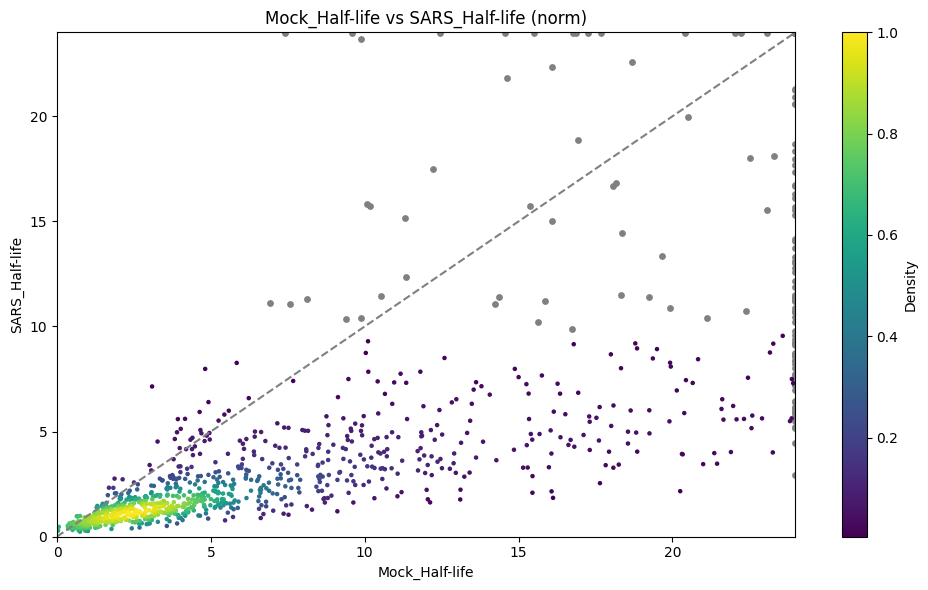

In [24]:
gp.plot_scatter(sars, x="Mock_Half-life", y="SARS_Half-life", limit=(0,24), diagonal=True)